In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from stim_surface_code.memory import MemoryPatch
from stim_surface_code import noise

# Basic usage

In [2]:
m = MemoryPatch(5, 5, 5, id_offset=100)
m

--------------------------------------------------------
|    |    |X125|    |    |    |X126|    |    |    |    |
----------+----+--------------+----+--------------------
|    | 100|    | 101|    | 102|    | 103|    | 104|    |
----------+----+----+----+----+----+----+----+----+-----
|    |    |Z127|    |X128|    |Z129|    |X130|    |Z131|
----------+----+----+----+----+----+----+----+----+-----
|    | 105|    | 106|    | 107|    | 108|    | 109|    |
-----+----+----+----+----+----+----+----+----+----------
|Z132|    |X133|    |Z134|    |X135|    |Z136|    |    |
-----+----+----+----+----+----+----+----+----+----------
|    |L110|    |L111|    |L112|    |L113|    |L114|    |
----------+----+----+----+----+----+----+----+----+-----
|    |    |Z137|    |X138|    |Z139|    |X140|    |Z141|
----------+----+----+----+----+----+----+----+----+-----
|    | 115|    | 116|    | 117|    | 118|    | 119|    |
-----+----+----+----+----+----+----+----+----+----------
|Z142|    |X143|    |Z144|    |

In [3]:
# 10x better noise vals than Google's device
noise_params = noise.GoogleNoiseParams.improve_noise_params(10)

print(noise_params.baseline_error_means)

{'T1': 0.0002, 'T2': 0.00030000000000000003, 'gate1_err': -5.0, 'gate2_err': -3.5, 'readout_err': -2.7}


In [4]:
m.set_error_vals_normal(noise_params.baseline_error_means, noise_params.baseline_error_stdevs)

In [5]:
m.count_logical_errors()

(0.0011676, 10000000)

# Increasing d

In [6]:
def get_noise_params(p):
    return noise.NoiseParams(
        {
            'T1':np.inf, 
            'T2':np.inf, 
            'gate1_err':np.log10(p), 
            'gate2_err':np.log10(p), 
            'readout_err':np.log10(p)
        },
    )

In [7]:
ds = [3,5,7]
ps = np.linspace(1e-2,1e-3,5)
z_vals = np.zeros((len(ds), len(ps)))
for i,d in enumerate(ds):
    for j,p in enumerate(ps):
        m = MemoryPatch(d, d, d)
        m.set_error_vals_normal(get_noise_params(p).baseline_error_means)
        ler = m.count_logical_errors(shots=10**6, observable_basis='Z', ideal_init_and_meas=True)[0]
        z_vals[i,j] = ler

In [8]:
ds = [3,5,7]
ps = np.linspace(1e-2,1e-3,5)
x_vals = np.zeros((len(ds), len(ps)))
for i,d in enumerate(ds):
    for j,p in enumerate(ps):
        m = MemoryPatch(d, d, d)
        m.set_error_vals_normal(get_noise_params(p).baseline_error_means)
        ler = m.count_logical_errors(shots=10**6, observable_basis='X', ideal_init_and_meas=True)[0]
        x_vals[i,j] = ler

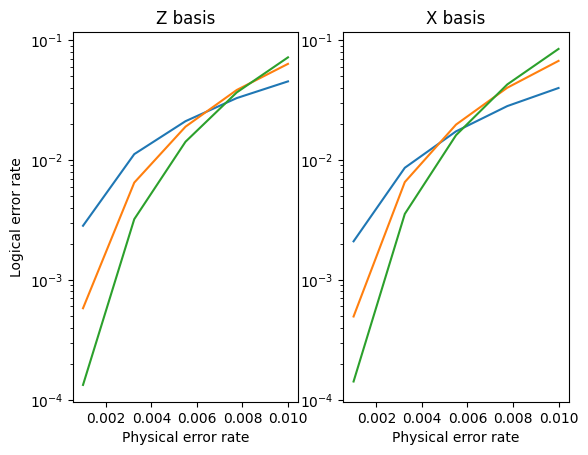

In [9]:
ax1 = plt.subplot(121)
ax1.plot(ps, z_vals.T)
ax1.set_yscale('log')
ax1.set_ylabel('Logical error rate')
ax1.set_title('Z basis')
ax1.set_xlabel('Physical error rate')

ax2 = plt.subplot(122, sharey=ax1)
ax2.plot(ps, x_vals.T)
ax2.set_title('X basis')
ax2.set_xlabel('Physical error rate')

plt.show()